## Quantum Illumination Experiment 2.1

__Find the optimal configurations for PCS state (coherent superpostion of photon subtraction and addition).__

- Author: L. Fan
- Created Date: 2017-09-19
- The Second Latest Modified: 2017-11-16
- The Latest Modified: 2017-11-19

--- 19898.92664051056 seconds ---

In [60]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# configuration
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('pdf', 'png')
# np.set_printoptions(threshold='nan', precision=6, suppress=True)

# plt.style.use(['seaborn-whitegrid', '14pt'])
plt.style.use(['14pt'])
%matplotlib inline

In [61]:
filename1 = 'expr_2_pcs_scan_nmax_24_nth_1.0_div_6x51_04-16.csv'
filename2 = 'expr_2_pcs_scan_nmax_24_nth_1.0_div_5x51_04-17.csv'
df1 = pd.read_csv('../output/data/expr_2/' + filename1, comment='#')
df2 = pd.read_csv('../output/data/expr_2/' + filename2, comment='#')

df = pd.concat([df1, df2])

# df = df[(df['Chernoff_Bound'] > 0.497) & (df['Chernoff_Bound'] < 0.5)]

filename = 'expr_3_qi_nmax_32_nth_1.0_g_91+25_04-13_opt_qcb_L-BFGS-B.csv'
dfb = pd.read_csv('../output/data/expr_3/' + filename, comment='#')

In [62]:
dashes = {'PA':[6,2], 'PAS':[6,2,1,2], 'PS':[3,2], 'PSA':[3,2,1,2], 'PCS':[1,1]}
names = ('TMSS', 'PS', 'PA', 'PSA', 'PAS', 'PCS')

In [63]:
df.head()

,nmax,Nth,R,State,lambda,Aver_N,VN_Entropy,Helstrom_Bound,Chernoff_Bound,optimal_s,A_aver_N,B_aver_N,ra,rb
24,1.0,0.01,PCS,0.01,0.01,0.000800,0.003530,0.499326,0.499999,0.5,0.000400,0.000400,0.0,0.00
24,1.0,0.01,PCS,0.01,0.01,0.002399,0.003529,0.499324,0.499999,0.5,0.000400,0.001999,0.0,0.02
24,1.0,0.01,PCS,0.01,0.01,0.007189,0.003527,0.499315,0.499999,0.5,0.000400,0.006789,0.0,0.04
24,1.0,0.01,PCS,0.01,0.01,0.015146,0.003524,0.499301,0.499999,0.5,0.000399,0.014746,0.0,0.06
24,1.0,0.01,PCS,0.01,0.01,0.026232,0.003520,0.499282,0.499999,0.5,0.000399,0.025833,0.0,0.08


In [64]:
sorted(df['lambda'].unique())

[0.01,
 0.050000000000000003,
 0.089999999999999997,
 0.13,
 0.17000000000000001,
 0.20999999999999999,
 0.25,
 0.28999999999999998,
 0.33000000000000002,
 0.37,
 0.40999999999999998]

In [65]:
df.shape

(28610, 14)

In [66]:
df['ra'].unique()

array([ 0.  ,  0.02,  0.04,  0.06,  0.08,  0.1 ,  0.12,  0.14,  0.16,
        0.18,  0.2 ,  0.22,  0.24,  0.26,  0.28,  0.3 ,  0.32,  0.34,
        0.36,  0.38,  0.4 ,  0.42,  0.44,  0.46,  0.48,  0.5 ,  0.52,
        0.54,  0.56,  0.58,  0.6 ,  0.62,  0.64,  0.66,  0.68,  0.7 ,
        0.72,  0.74,  0.76,  0.78,  0.8 ,  0.82,  0.84,  0.86,  0.88,
        0.9 ,  0.92,  0.94,  0.96,  0.98,  1.  ])

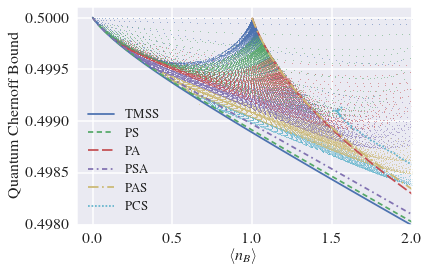

In [45]:
for lmd in df['lambda'].unique():
    temp = df[df['lambda'] == lmd]
    plt.scatter(temp['B_aver_N'], temp['Chernoff_Bound'], s=0.2, label=None)

for name in names:
    temp_df = dfb[dfb['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['B_aver_N'], temp_df['Chernoff_Bound'], label=name)
    else:
        plt.plot(temp_df['B_aver_N'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
        
plt.xlim(-0.1, 2)
plt.ylim(0.498, 0.5001)

plt.legend(loc=3, fontsize=13)
plt.xlabel("$\langle n_B \\rangle$")
plt.ylabel("Quantum Chernoff Bound")

plt.show()

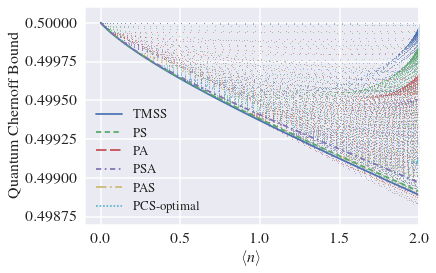

In [54]:
for lmd in sorted(df['lambda'].unique()):
    temp = df[df['lambda'] == lmd]
    plt.scatter(temp['Aver_N'], temp['Chernoff_Bound'], s=0.2, label=None)

for name in names:
    temp_df = dfb[dfb['State'] == name]
    if name == 'TMSS':
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], label=name)
    elif name == 'PCS':
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label='PCS-optimal')
    else:
        plt.plot(temp_df['Aver_N'], temp_df['Chernoff_Bound'], 
                 dashes=dashes[name], label=name)
        
plt.xlim(-0.1, 2)
plt.ylim(0.4987, 0.5001)

plt.legend(loc=3, fontsize=13)
plt.xlabel("$\langle n \\rangle$")
plt.ylabel("Quantum Chernoff Bound")

plt.show()

In [145]:
df4  = df[df['lambda'] == 0.09]
df4.shape

(2593, 14)

(0.4986, 0.5)

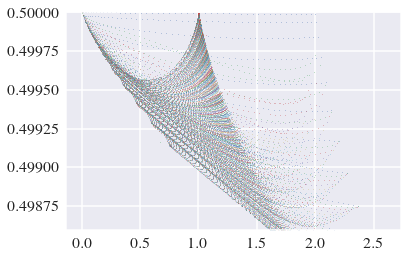

In [59]:
# plt.figure(figsize=(10, 10))
for ra in df['ra'].unique():
    temp = df[df['ra'] == ra]
    plt.scatter(temp['B_aver_N'], temp['Chernoff_Bound'], s=0.1)

# plt.legend(fontsize=18)
plt.ylim(0.4986, 0.5)

In [105]:
temp = df[df['lambda'] == sorted(df['lambda'].unique())[0]]
temp['lambda'].unique()

array([ 0.01])

In [106]:
size = 51

In [107]:
X1 = temp['ra'].values.reshape(size, size)
Y1 = temp['rb'].values.reshape(size, size)
hb1 = temp['Helstrom_Bound'].values.reshape(size, size)
cb1 = temp['Chernoff_Bound'].values.reshape(size, size)
n1 = temp['Aver_N'].values.reshape(size, size)
vn1 = temp['VN_Entropy'].values.reshape(size, size)
na1 = temp['A_aver_N'].values.reshape(size, size)
nb1 = temp['B_aver_N'].values.reshape(size, size)

In [108]:
cb1.max()

0.49999926741731993

In [109]:
test = temp[['ra', 'rb', 'Chernoff_Bound']]

In [110]:
for res in test.iterrows():
    if res[1]['Chernoff_Bound'] > 0.5 or res[1]['Chernoff_Bound'] < 0.3:
        print(res[1])

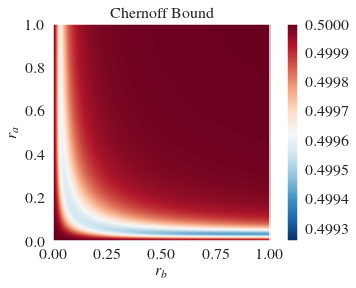

In [111]:
plt.imshow(cb1, vmax=0.5, cmap='RdBu_r', interpolation='BiCubic', 
           origin='lower', extent=[0, 1, 0, 1])
plt.colorbar()
plt.xlabel('$r_b$')
plt.ylabel('$r_a$')
plt.grid(False)
plt.title('Chernoff Bound')
# plt.savefig('../output/figures/g_pcs_qcb_01.pdf', bbox_inches='tight')